In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import zipfile
import matplotlib.pyplot as plt

In [82]:
%run /Users/emmam/Documents/Flatiron/phase_2/movies-analysis/code/data_preparation.ipynb

C:\Users\emmam
C:\Users\emmam\Documents
C:\Users\emmam\Documents\Flatiron
C:\Users\emmam\Documents\Flatiron\phase_2
C:\Users\emmam\Documents\Flatiron\phase_2\movies-analysis
C:\Users\emmam\Documents\Flatiron\phase_2\movies-analysis\zippedData
C:\Users\emmam\Documents\Flatiron\phase_2\movies-analysis\zippedData
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Nul

In [83]:
movie_budgets.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year'],
      dtype='object')

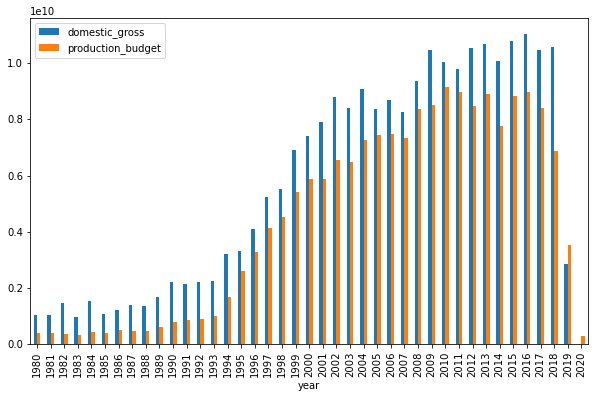

In [84]:
movie_budgets_filtered = movie_budgets[movie_budgets['year'] >= 1980]
movie_budgets_grouped = movie_budgets_filtered.groupby('year')[['domestic_gross', 'production_budget']].sum()

fig, ax = plt.subplots(figsize=(10, 6))

movie_budgets_grouped.plot(kind='bar', ax=ax)
plt.show()

In [85]:
movie_budgets_genres.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year', 'genre_ids', 'popularity', 'vote_average',
       'vote_count', 'primary_genre'],
      dtype='object')

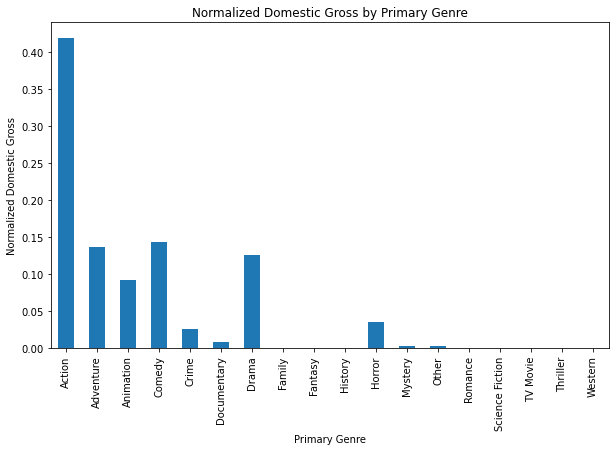

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))

# Group the data by 'primary_genre' and calculate the sum of 'domestic_gross' for each genre
genre_grouped = movie_budgets_genres.groupby('primary_genre')['domestic_gross'].sum()

# Calculate the normalized domestic gross by dividing by the sum of all genres
normalized_domestic_gross = genre_grouped / genre_grouped.sum()

# Plot the normalized domestic gross for each genre
normalized_domestic_gross.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Normalized Domestic Gross')
ax.set_title('Normalized Domestic Gross by Primary Genre')

plt.xticks(rotation=90)
plt.show()

In [103]:
# Group the data by 'primary_genre'
genre_grouped = movie_budgets_genres.groupby('primary_genre')['domestic_gross'].sum()

# Calculate descriptive statistics for each genre
genre_statistics = movie_budgets_genres.groupby('primary_genre')['domestic_gross'].describe()

# Display the descriptive statistics
print(genre_statistics)

                 count          mean           std         min          25%  \
primary_genre                                                                 
Action           599.0  8.416299e+07  1.161537e+08         0.0  10692891.00   
Adventure        192.0  8.541387e+07  1.007476e+08         0.0   8497640.25   
Animation         93.0  1.194036e+08  1.390869e+08         0.0    450594.00   
Comedy           503.0  3.443758e+07  4.314321e+07         0.0   1536616.00   
Crime            137.0  2.314256e+07  3.132118e+07         0.0    252676.00   
Documentary       83.0  1.237071e+07  3.380834e+07         0.0     18779.50   
Drama            592.0  2.560088e+07  3.970780e+07         0.0    555227.00   
Family             4.0  1.740390e+07  3.410090e+07         0.0         0.00   
Fantasy            8.0  1.661884e+07  1.452323e+07     56491.0   1905594.50   
History            1.0  1.754800e+07           NaN  17547999.0  17547999.00   
Horror           155.0  2.757173e+07  4.455746e+07  

In [110]:
# Group the data by 'primary_genre'
grouped_by_genre = movie_budgets_genres.groupby('primary_genre')

# Calculate descriptive statistics for 'domestic_gross' for each genre
genre_statistics = grouped_by_genre['domestic_gross'].describe()

genre_statistics

,count,mean,std,min,25%,50%,75%,max
primary_genre,,,,,,,,
Action,599.0,8.416299e+07,1.161537e+08,0.0,10692891.00,42025135.0,1.035023e+08,760507625.0
Adventure,192.0,8.541387e+07,1.007476e+08,0.0,8497640.25,48923062.5,1.231847e+08,486295561.0
Animation,93.0,1.194036e+08,1.390869e+08,0.0,450594.00,55750480.0,1.773975e+08,504014165.0
Comedy,503.0,3.443758e+07,4.314321e+07,0.0,1536616.00,18450127.0,5.304618e+07,254464305.0
Crime,137.0,2.314256e+07,3.132118e+07,0.0,252676.00,10378555.0,3.560638e+07,150117807.0
Documentary,83.0,1.237071e+07,3.380834e+07,0.0,18779.50,1759252.0,7.178695e+06,234280354.0
Drama,592.0,2.560088e+07,3.970780e+07,0.0,555227.00,8167454.5,3.455798e+07,274092705.0
Family,4.0,1.740390e+07,3.410090e+07,0.0,0.00,532953.5,1.793685e+07,68549695.0
Fantasy,8.0,1.661884e+07,1.452323e+07,56491.0,1905594.50,19174093.5,2.610302e+07,37662162.0
